[View in Colaboratory](https://colab.research.google.com/github/andandandand/ImageSegmentationOnlineCourse/blob/master/Segmentation_Comparison.ipynb)

## Compare the segments obtained through the watershed transform and SLIC

As it is difficult to obtain good segmentations, and the definition of “good” often depends on the application, so-called "low level" methods (such as the watershed transform and SLIC) are usually used for obtaining "superpixels" (which are group of pixels that share some statistical feature). These superpixels are usually given as input of more sophisticated methods that group them (such as the "Irregular GrowCut" algoright that we'll study later). 

We obtain segments in the watershed transform by "overflowing" the regions between the image gradients (where change is more drastic). We can specify the number of starting points (the markers) from which these overflowing occurs. This number gives the minimum number of segments in the image.

SLIC performs the k-means algorithm in the five dimensional space of RGB (3 dimensions)color info and x, y location (2 dimensions). We process the images in LAB color space to get a better separability of features.  We can specify an upper bound for the max number of segments in the image, as well as the compactness of the segments. 

On the drill below, we use `skimage.segmentation` to compare the segments obtained with both; `mark_boundaries` allows us to see where we get the end of border of each segment. 





SLIC number of segments: 190
watershed number of segments: 256


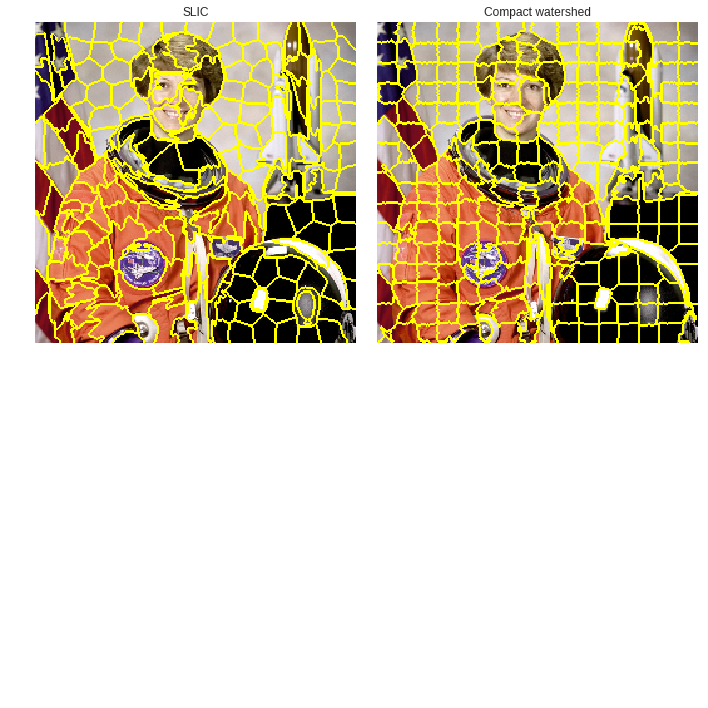

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import  slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

#call SLIC, with segment compactness = 10
segments_slic = ___(img, _____=250, compactness=10, sigma=1) #hint: slic, n_segments
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = ______(gradient, ____=250, compactness=0.01) # hint: watershed, markers

#count the number of segments
print('SLIC number of segments: {}'.format(len(np._____(segments_slic)))) #unique
print('watershed number of segments: {}'.format(len(np._____(segments_watershed))))#unique

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(______(img, segments_slic)) # mark boundaries
ax[0, 0].set_title('SLIC')

ax[0, 1].imshow(______(img, segments_watershed)) # mark boundaries
ax[0, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

### Solution

SLIC number of segments: 190
watershed number of segments: 256


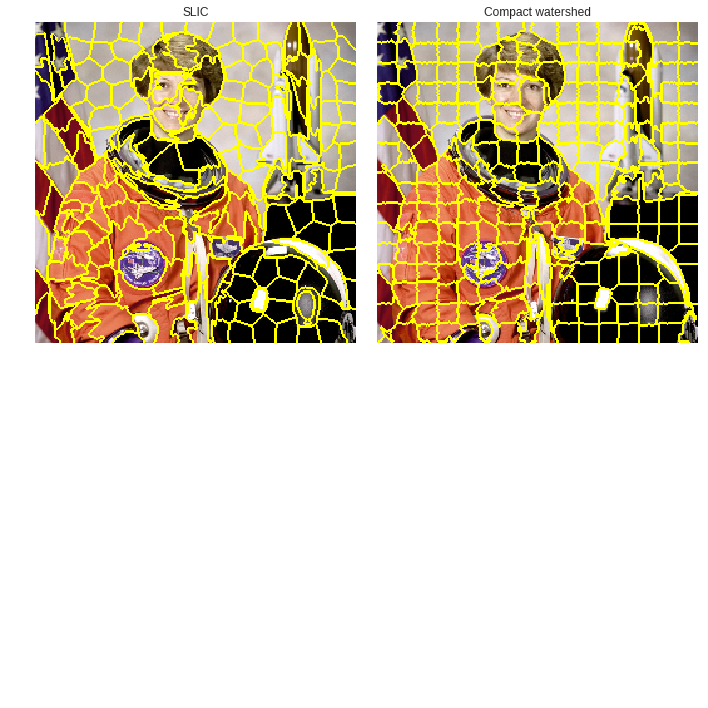

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import  slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

#call SLIC, with segment compactness = 10
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = watershed(gradient, markers=250, compactness=0.01)

#count the number of segments
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('watershed number of segments: {}'.format(len(np.unique(segments_watershed))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')

ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()